In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fho-data-house-price/sample_submission.csv
/kaggle/input/fho-data-house-price/train.csv
/kaggle/input/fho-data-house-price/test.csv


In [38]:
#Importação dos pacotes
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Data wrangling

In [5]:
#Aquisição dos dados para o treino do modelo
df = pd.read_csv("/kaggle/input/fho-data-house-price/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
#Analisando os dados contidos nas colunas
info = df.info()
info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Retirando valores não númericos
colunas_object = df.select_dtypes(include=['object']).columns
BaseSemObject = df.drop(columns=colunas_object)
BaseSemObject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [8]:
#Verificando valores null
BaseSemObject.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [9]:
#Retirando linha que contem valores null
BaseTreino = BaseSemObject.dropna()
BaseTreino.isnull().sum()
BaseTreino.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  BsmtHalfBath 

# Correlação entre cada variável

In [37]:
BaseTreino.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.021937,-0.013289,-0.040711,-0.058269,0.004387,-0.020862,-0.027664,-0.073472,-0.013751,...,-0.025060,-0.001972,0.009935,-0.066833,0.015183,0.048010,0.045799,-0.000570,0.013407,-0.047122
MSSubClass,0.021937,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,...,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.013289,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,...,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.040711,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,...,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,-0.058269,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,...,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,0.004387,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,...,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,-0.020862,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,...,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,-0.027664,0.006645,0.086414,0.026848,0.570757,0.039402,0.623171,1.000000,0.193376,0.120774,...,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
MasVnrArea,-0.073472,0.040240,0.189969,0.106115,0.423988,-0.166762,0.332190,0.193376,1.000000,0.285331,...,0.174649,0.129532,-0.116832,0.022331,0.052646,0.021648,-0.054044,0.015850,-0.017569,0.488658
BsmtFinSF1,-0.013751,-0.070389,0.241352,0.230441,0.249500,-0.054788,0.236941,0.120774,0.285331,1.000000,...,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301


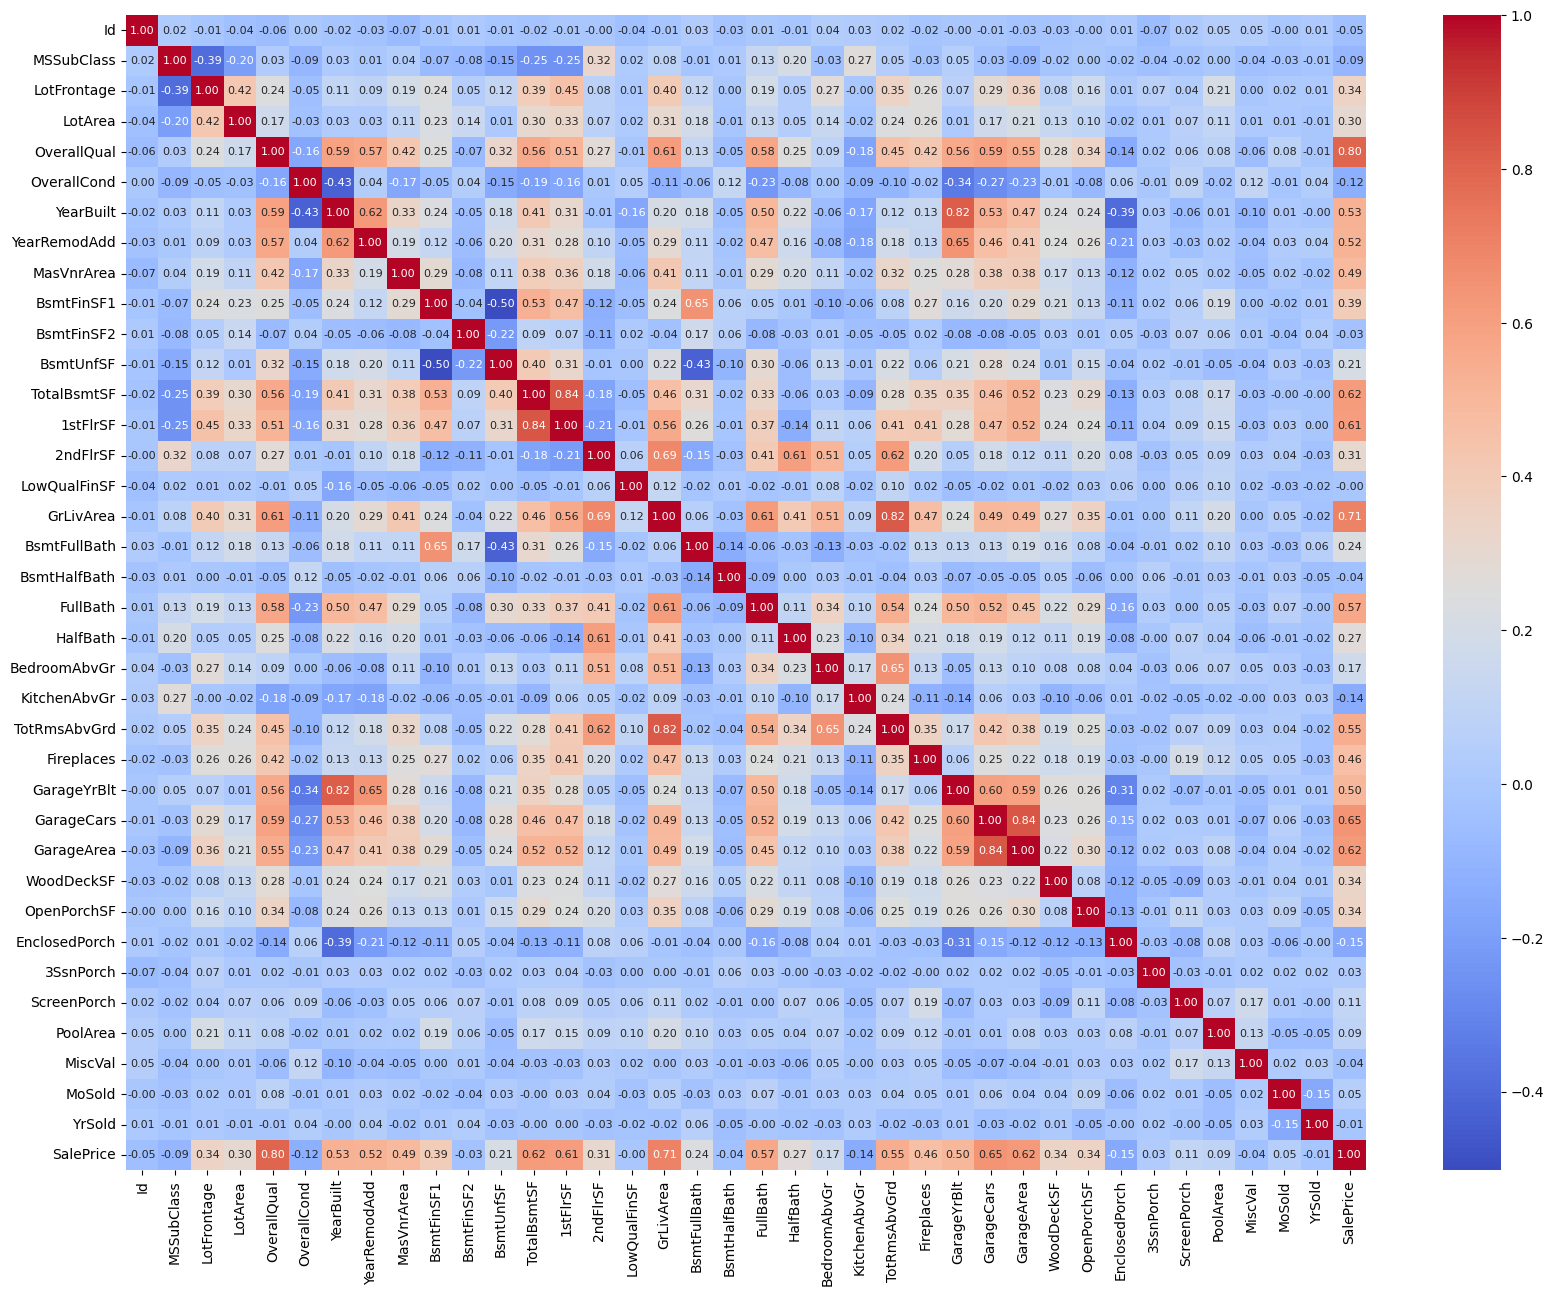

In [26]:
corr = BaseTreino.corr()
plt.rcParams["figure.figsize"] = (20,15)
matriz = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})

In [27]:
corrForte = []
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j] >= 0.70 or corr.iloc[i, j] <= -0.70:
            colunaY = corr.columns[i]
            colunaX = corr.columns[j]
            corrForte.append((colunaY, colunaX))

In [34]:
#Pares com correlações fortes
corrForte

[('1stFlrSF', 'TotalBsmtSF'),
 ('TotRmsAbvGrd', 'GrLivArea'),
 ('GarageYrBlt', 'YearBuilt'),
 ('GarageArea', 'GarageCars'),
 ('SalePrice', 'OverallQual'),
 ('SalePrice', 'GrLivArea')]

In [45]:
CorrForte = list(set([col for pair in corrForte for col in pair]))
BaseCorrForte = BaseTreino[CorrForte]

,SalePrice,GarageYrBlt,GrLivArea,GarageArea,1stFlrSF,GarageCars,TotRmsAbvGrd,TotalBsmtSF,OverallQual,YearBuilt
0,208500,2003.0,1710,548,856,2,8,856,7,2003
1,181500,1976.0,1262,460,1262,2,6,1262,6,1976
2,223500,2001.0,1786,608,920,2,6,920,7,2001
3,140000,1998.0,1717,642,961,3,7,756,7,1915
4,250000,2000.0,2198,836,1145,3,9,1145,8,2000
...,...,...,...,...,...,...,...,...,...,...
1455,175000,1999.0,1647,460,953,2,7,953,6,1999
1456,210000,1978.0,2073,500,2073,2,7,1542,6,1978
1457,266500,1941.0,2340,252,1188,1,9,1152,7,1941
1458,142125,1950.0,1078,240,1078,1,5,1078,5,1950


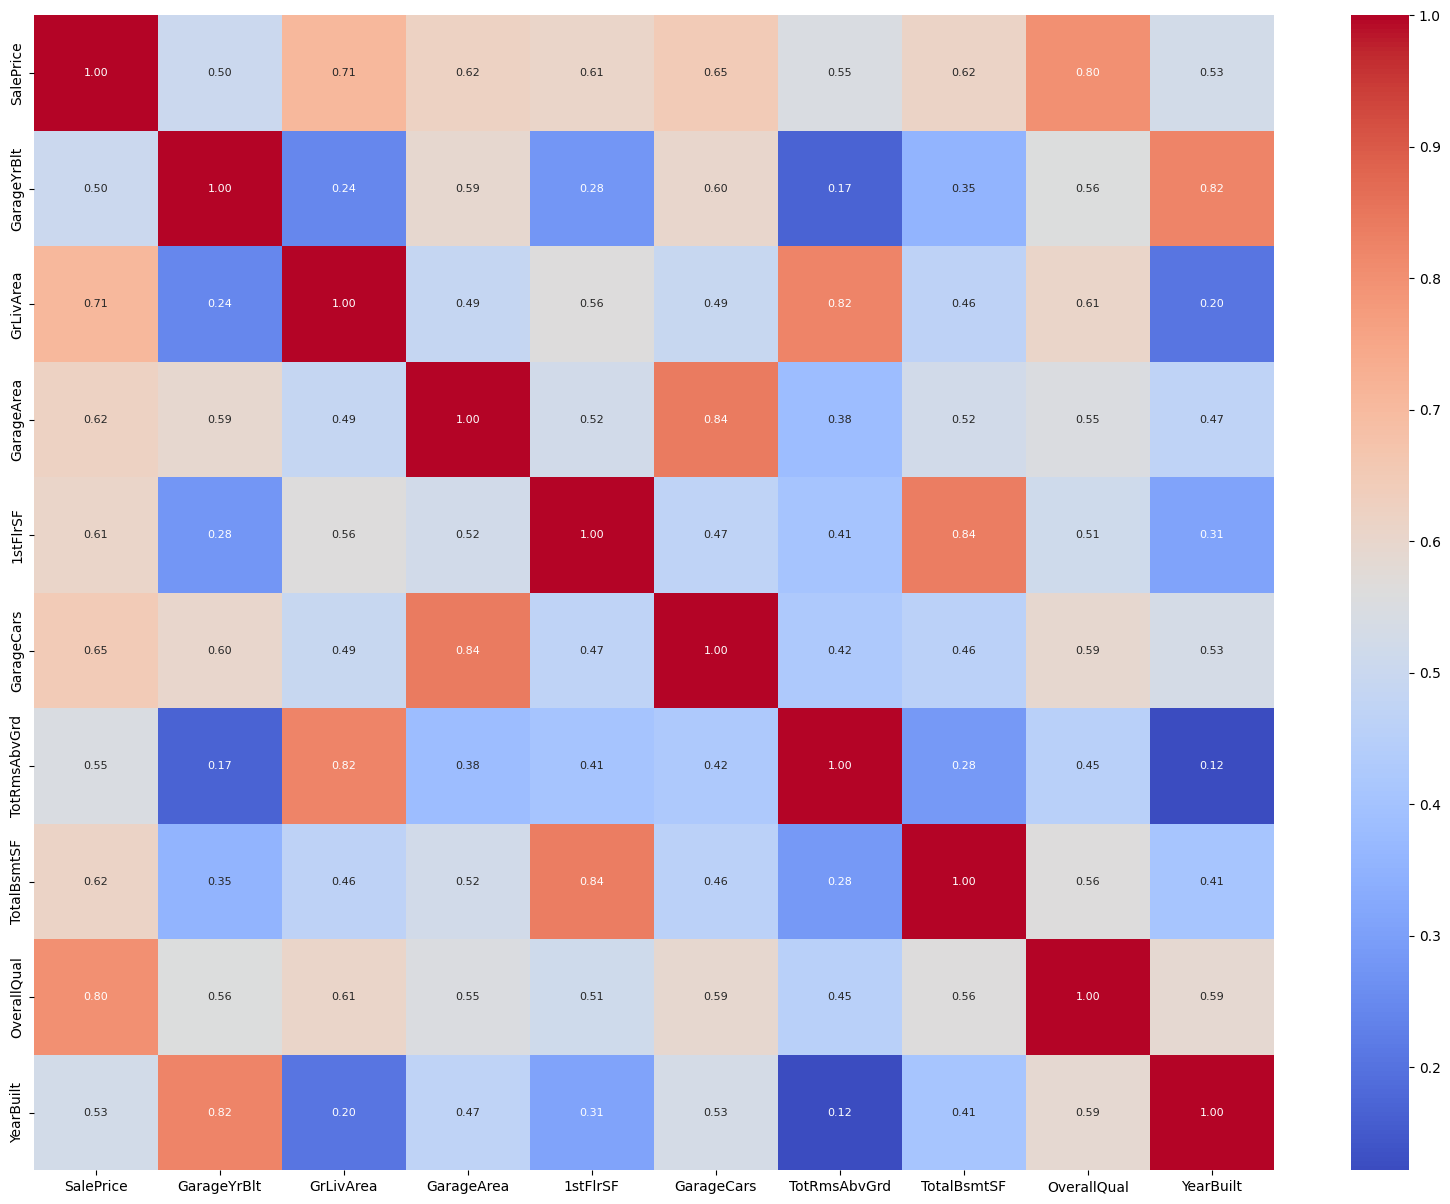

In [46]:
corr = BaseCorrForte.corr()
plt.rcParams["figure.figsize"] = (20,15)
matriz = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})

# Regressão Linear

In [119]:

x = BaseCorrForte.drop(columns = ['SalePrice'])
y = BaseCorrForte['SalePrice']

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [120]:
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [127]:
a_coeff = modelo.coef_
l_coeff = modelo.intercept_

#y = a + b*x -> y = l_coeff + a_coeff*x

9

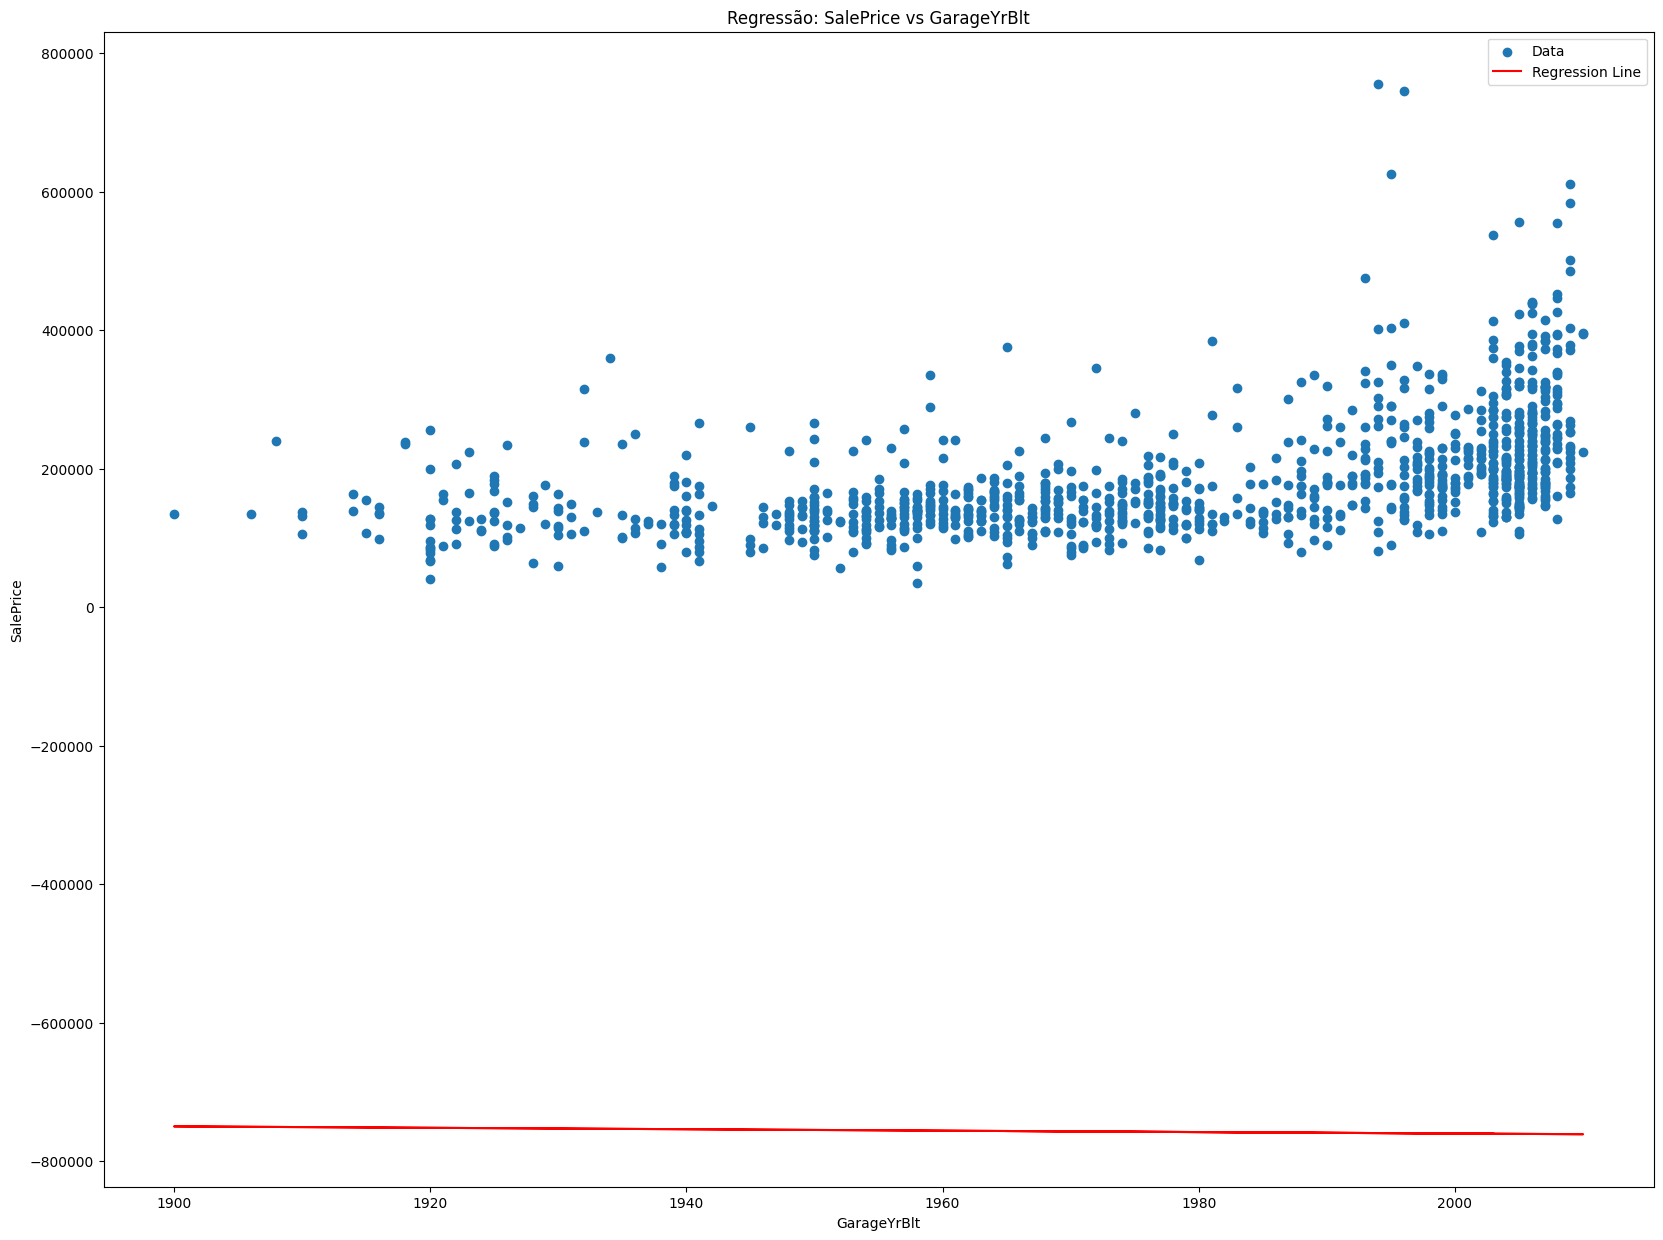

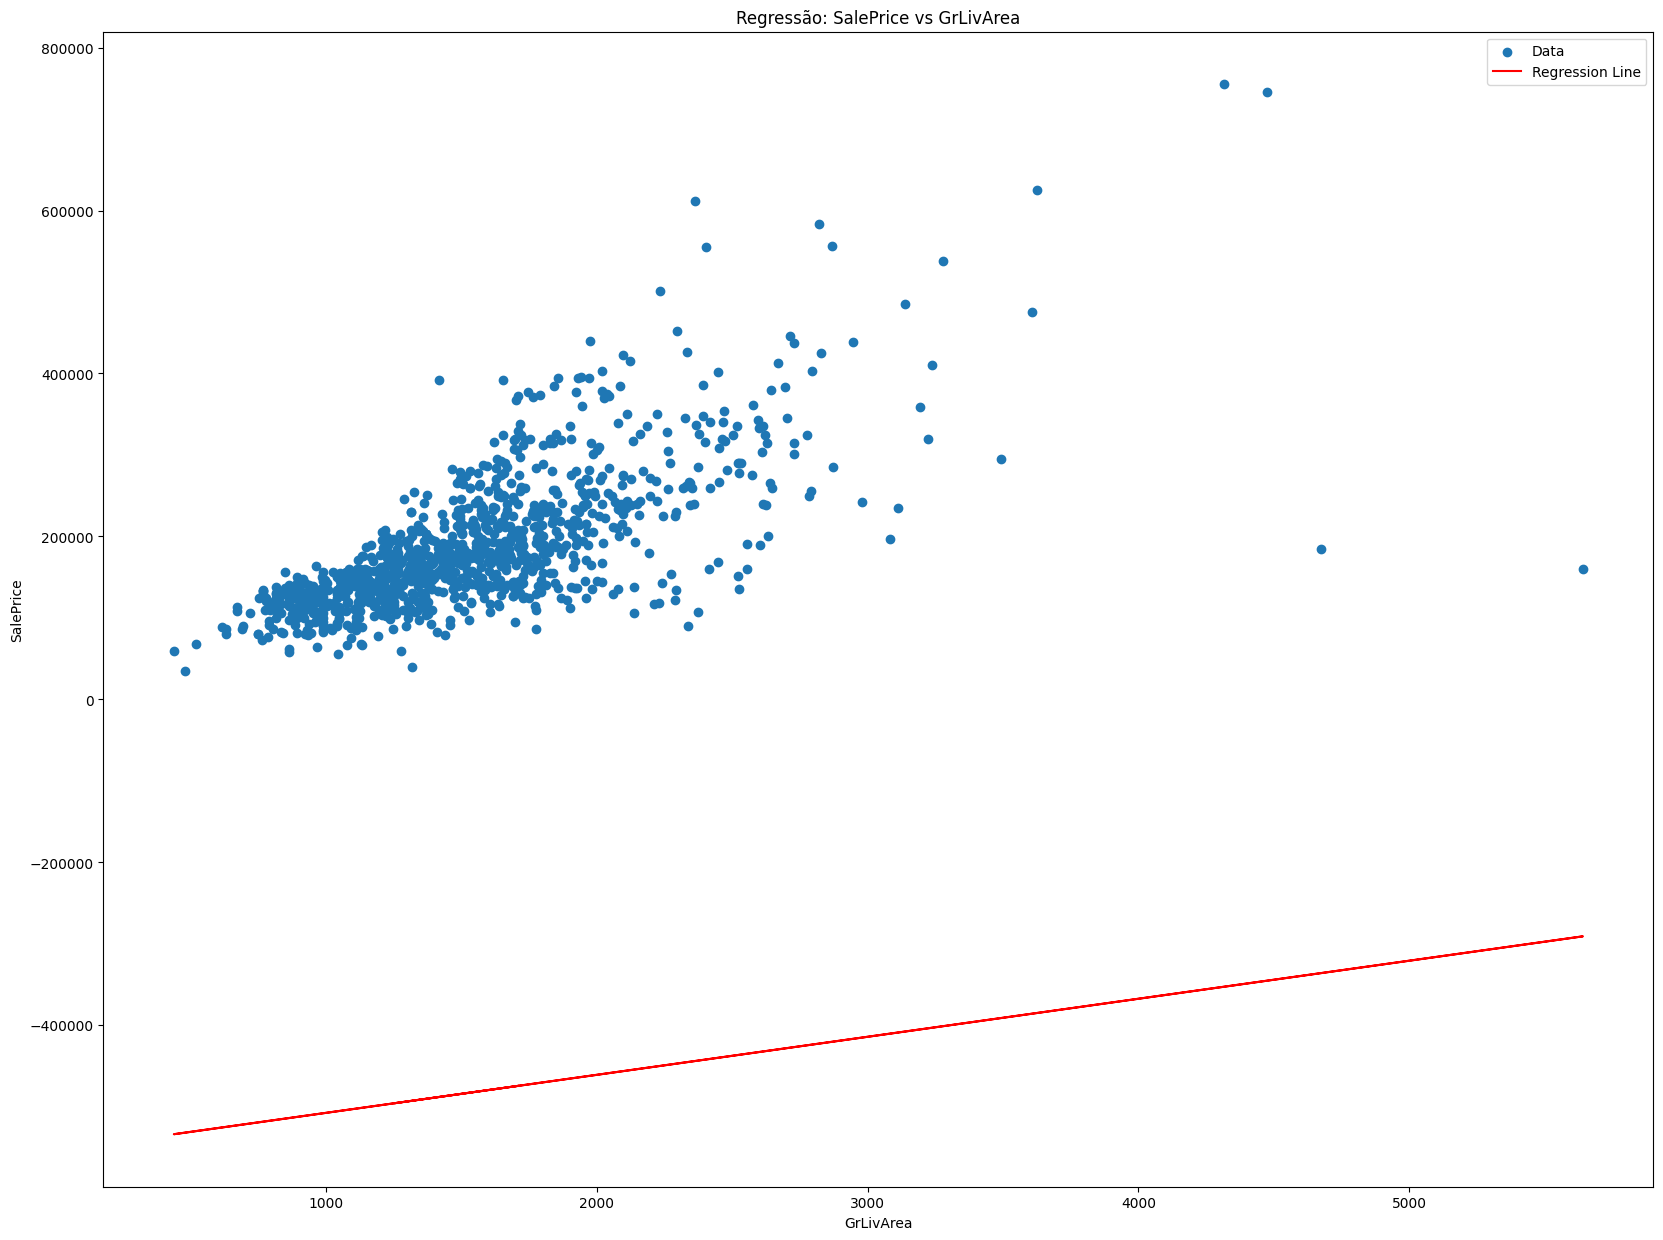

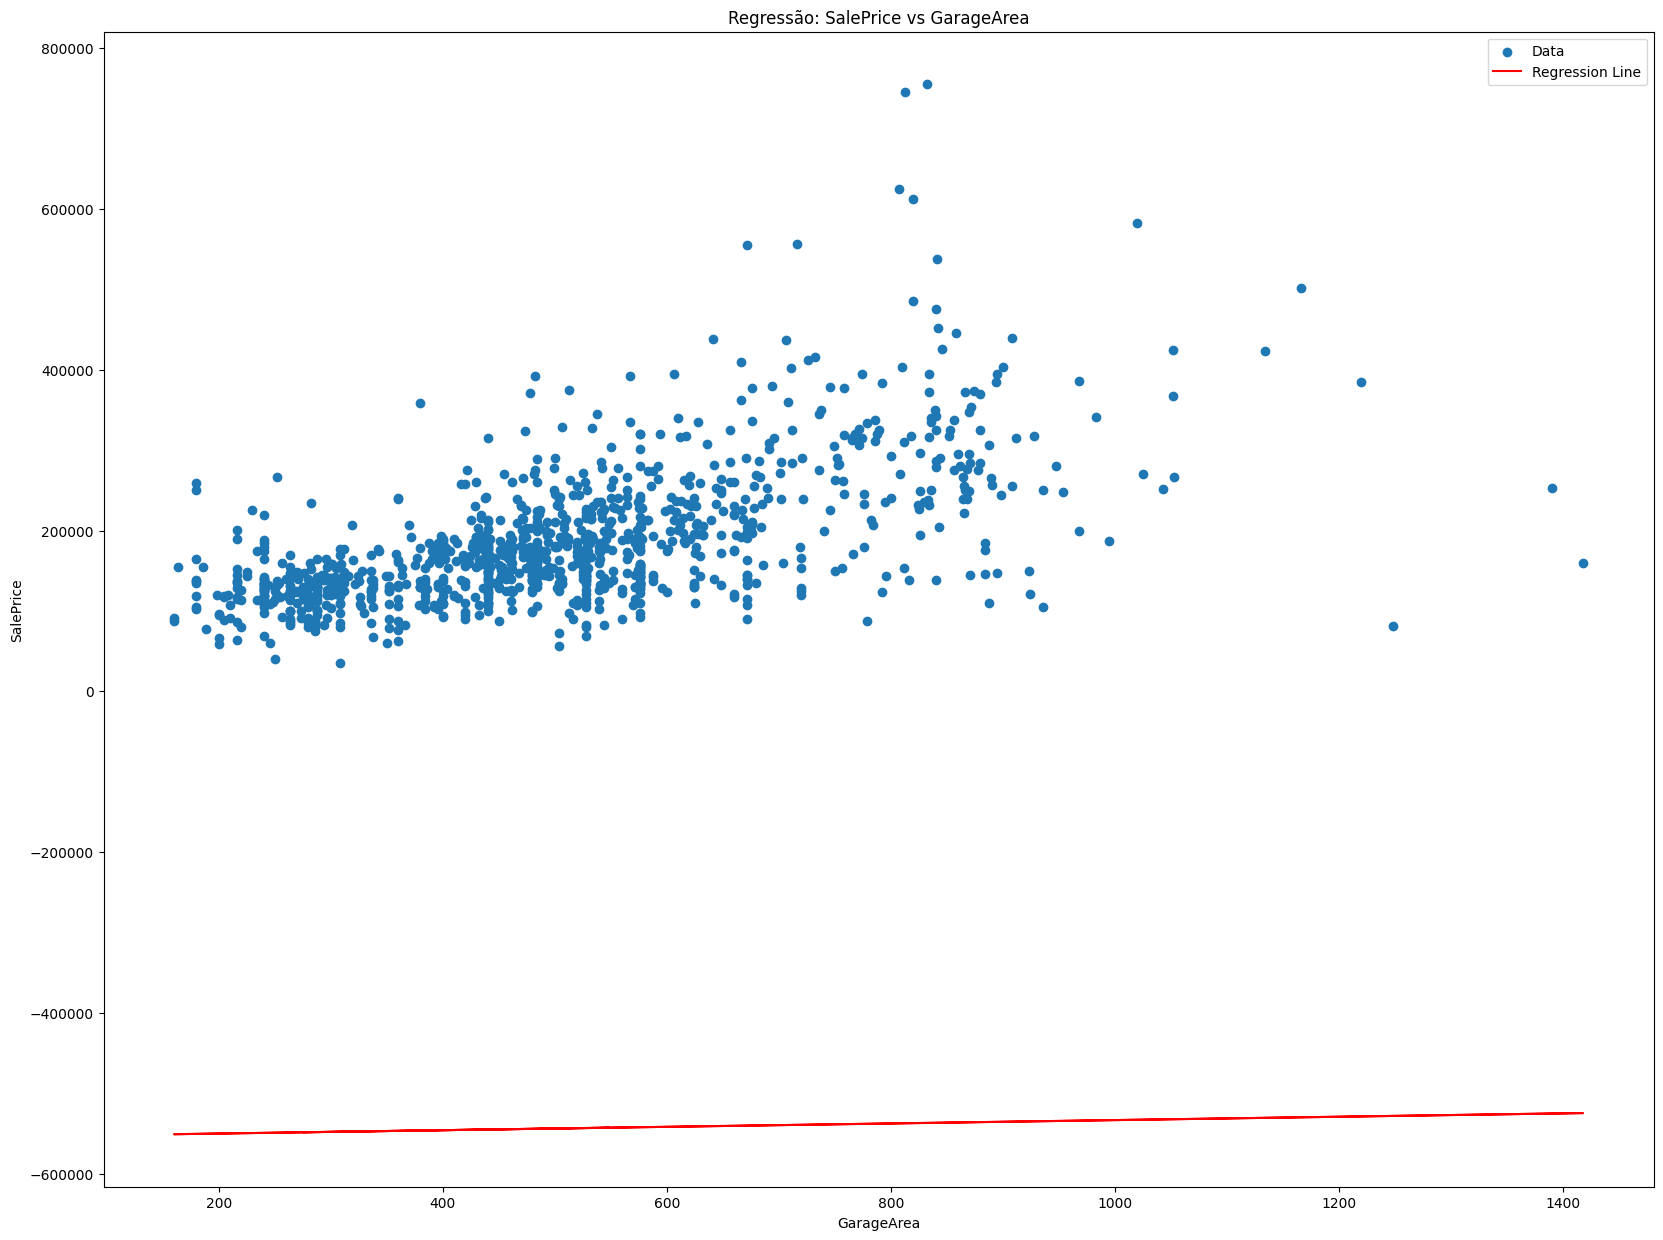

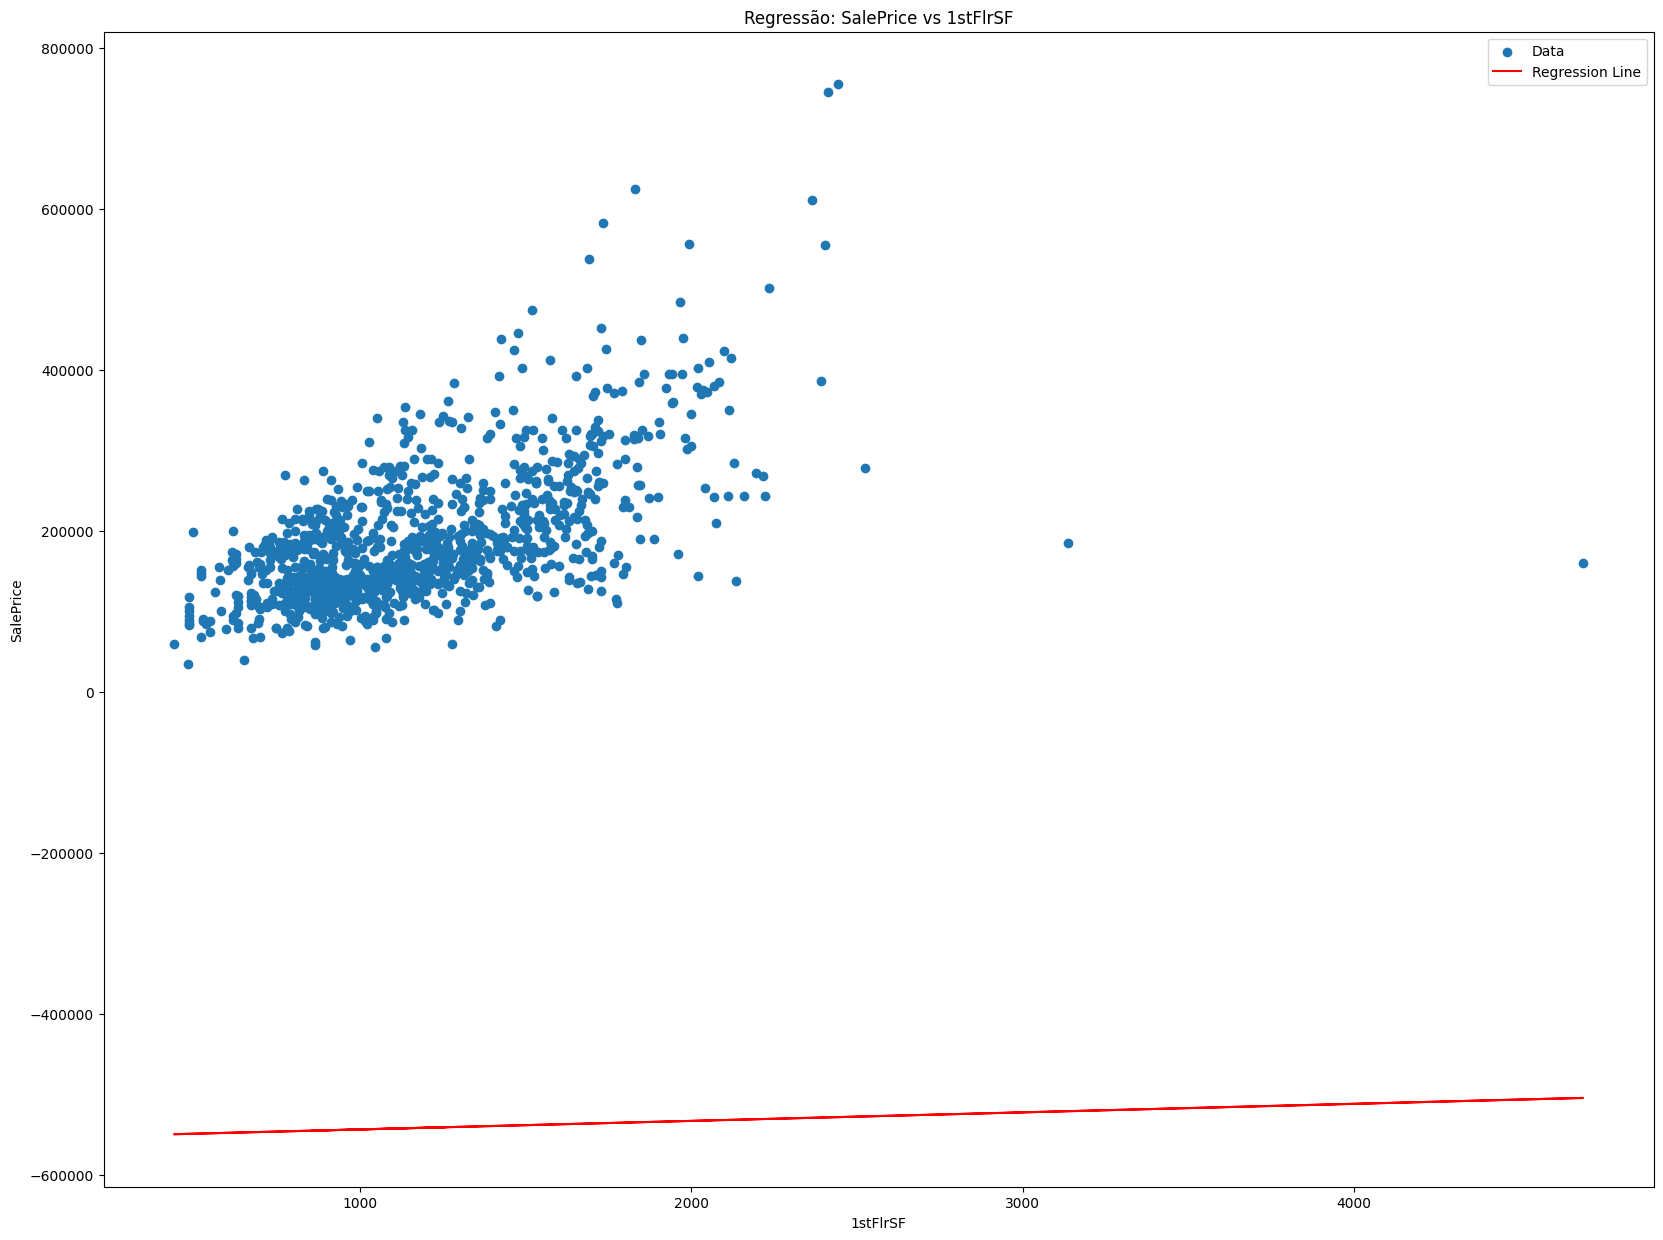

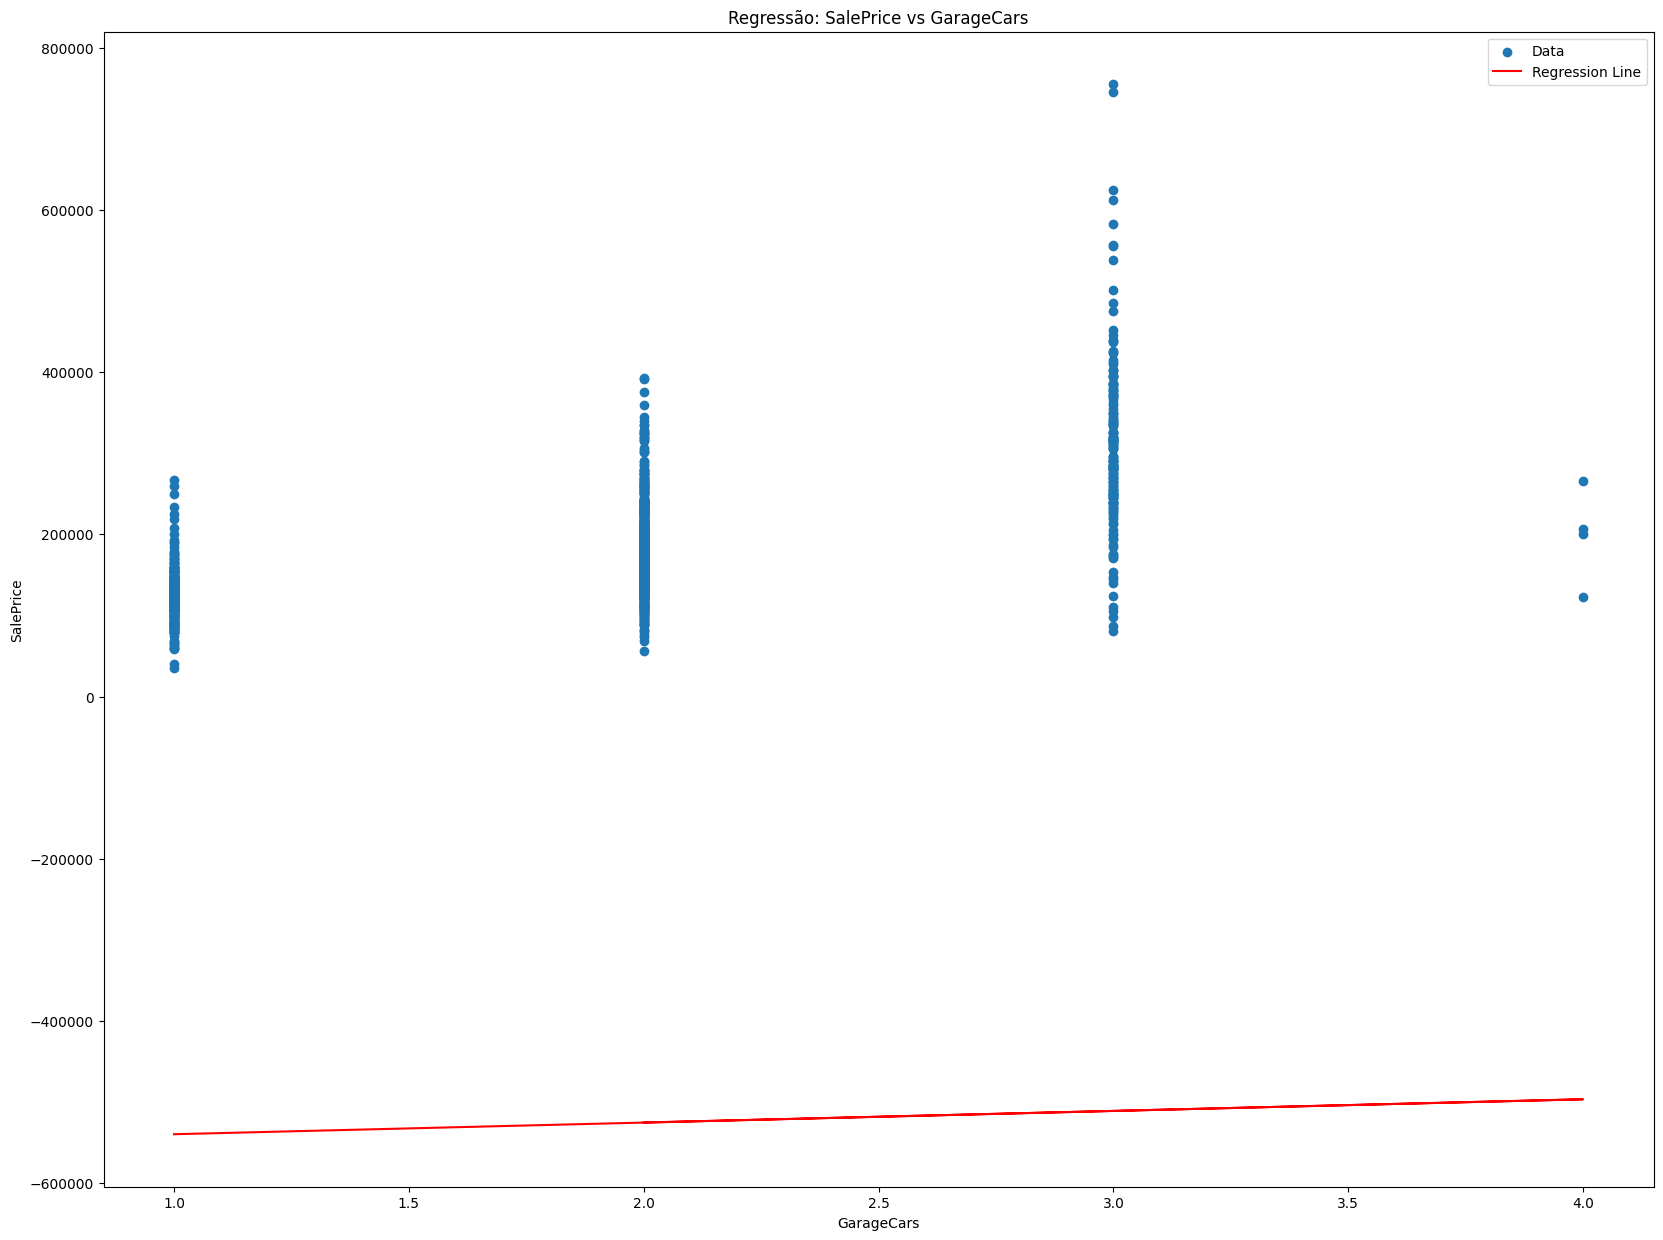

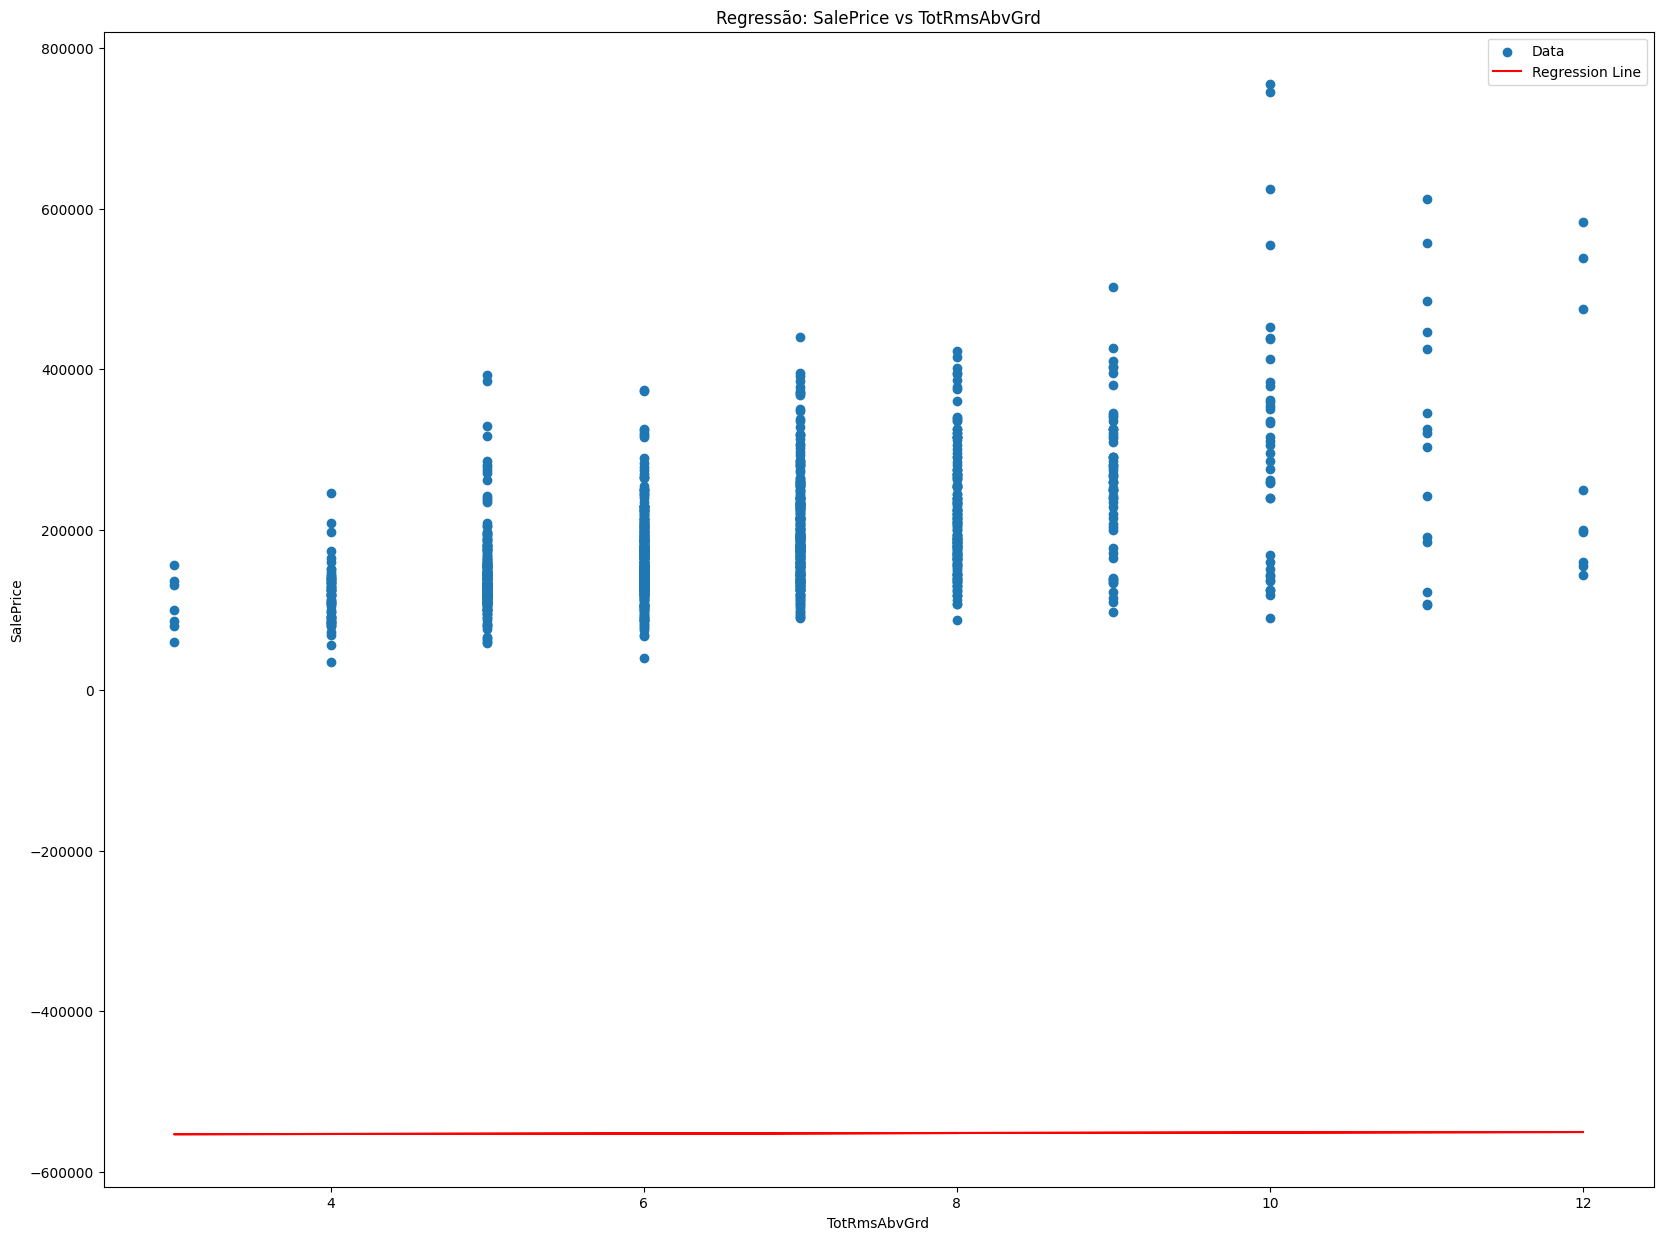

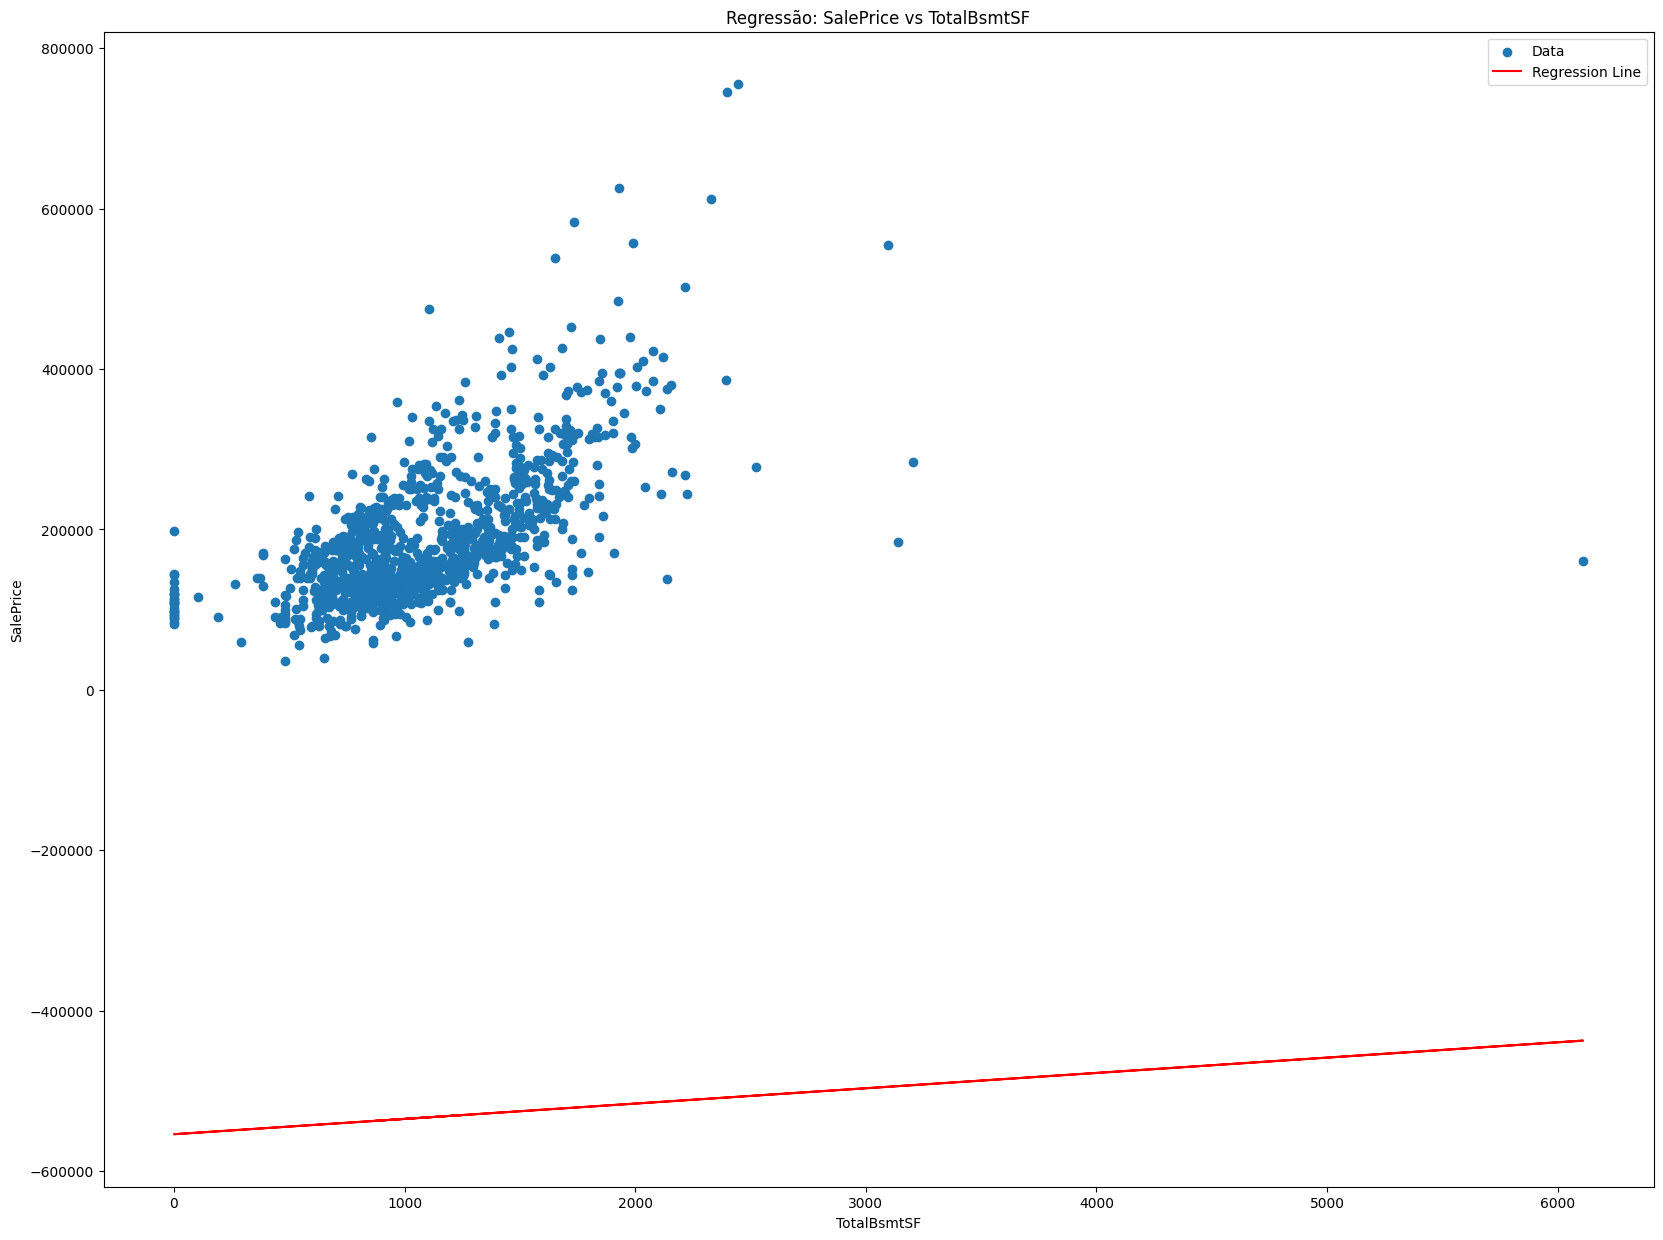

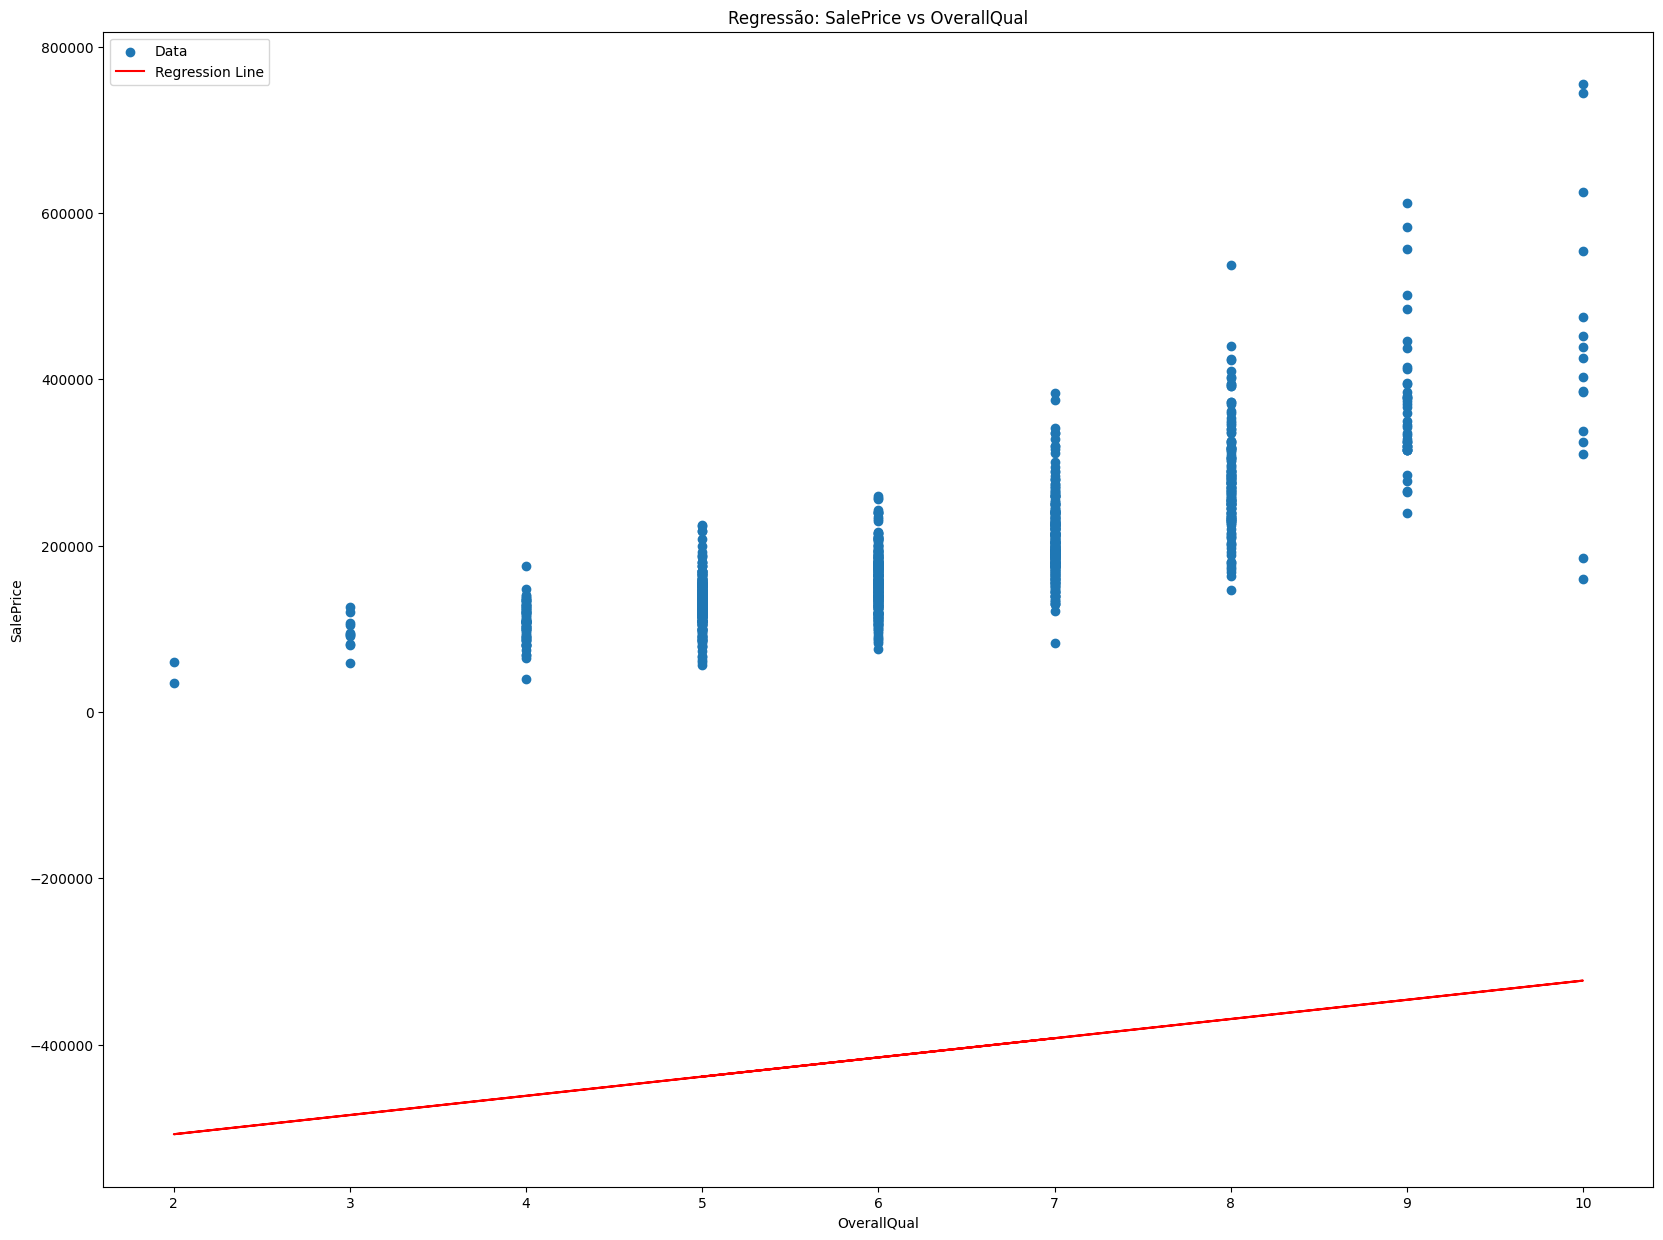

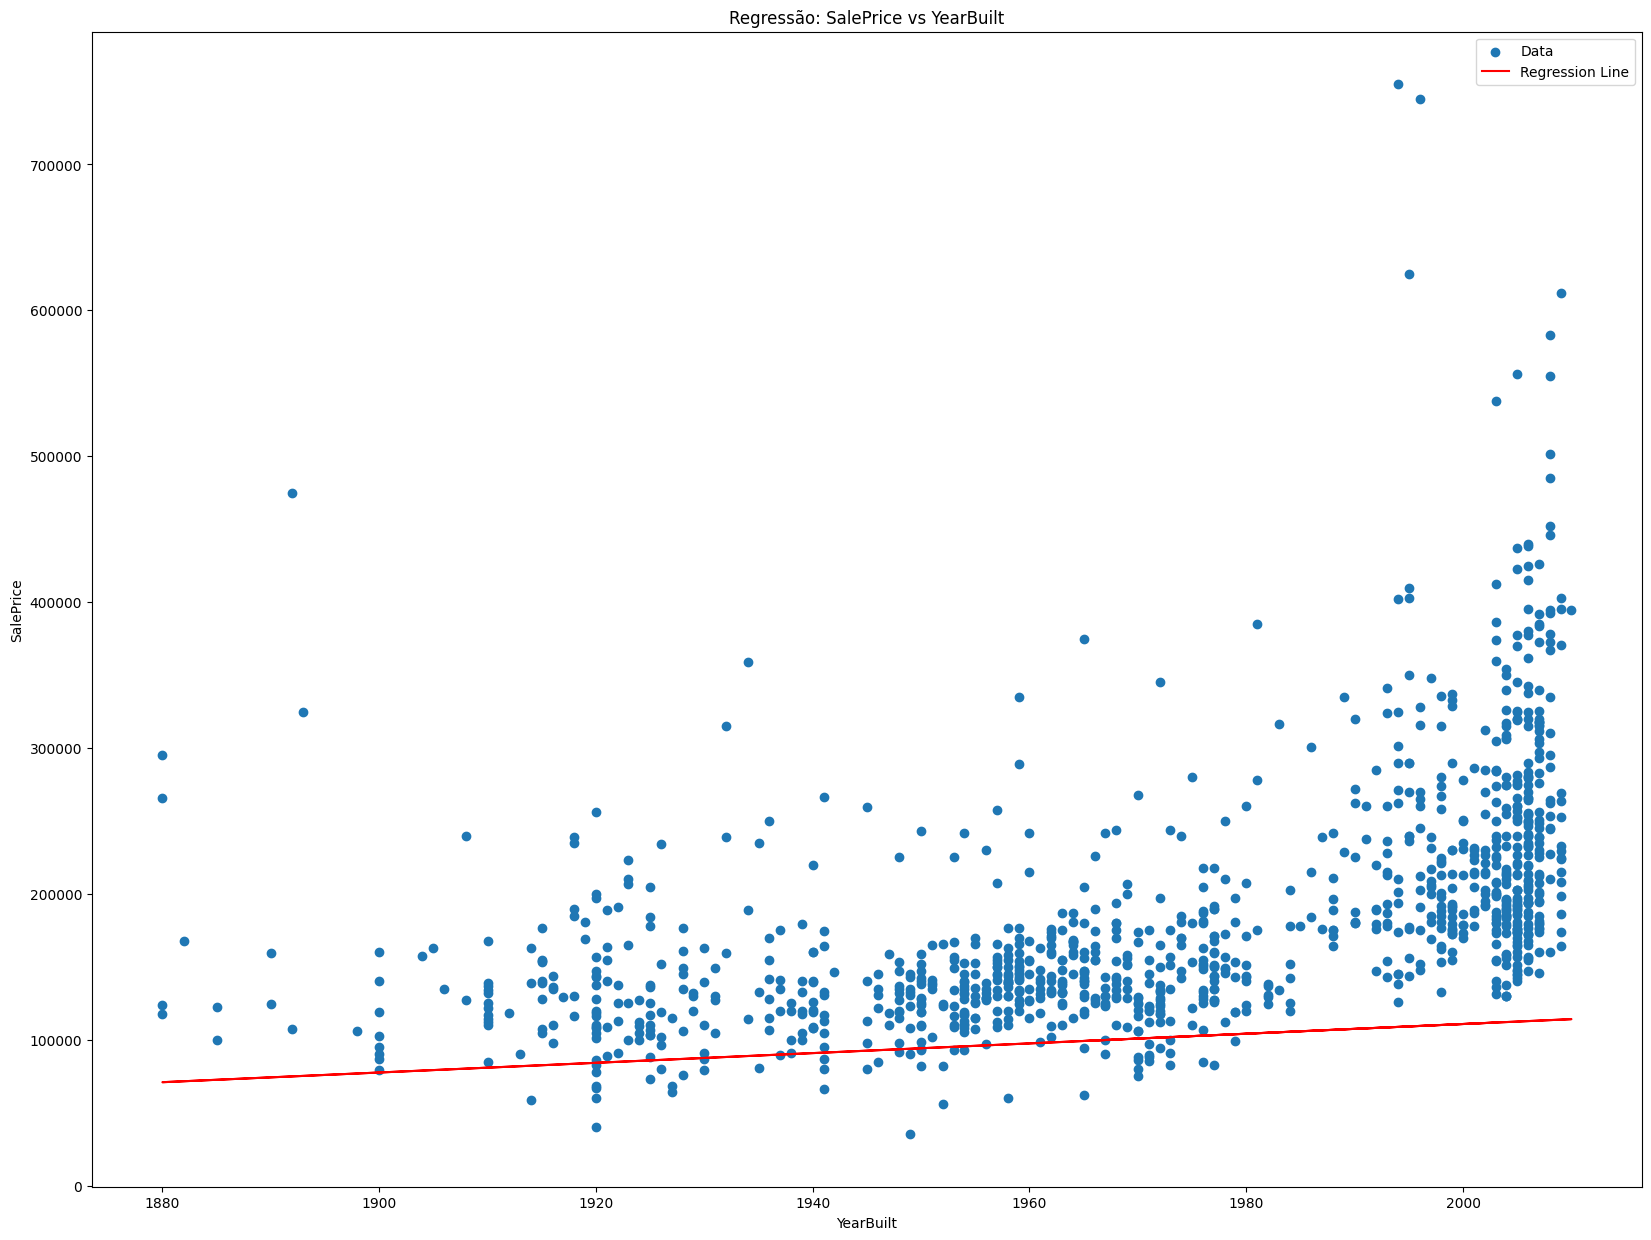

In [135]:
for i, column in enumerate(x.columns):
    plt.scatter(x[column], y, label='Data')
    plt.plot(x[column], l_coeff + a_coeff[i] * x[column], color='red', label='Regression Line')
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.title(f'Regressão: SalePrice vs {column}')
    plt.legend()
    plt.show()